Importing all files and Pretrained RESNET 50 for fine tuning 


In [1]:

from tqdm import tqdm 
import tensorflow as tf 
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten, Input
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from google.cloud import storage 
from io import BytesIO
import time
import cv2
start = time.time()
 
import pandas as pd

import zipfile
from google.colab import drive
import os

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# # !gdown https://drive.google.com/file/d/1h1z2fwar1a0W1r3rrRF8eDu3ZMjZT0Y7/view?usp=sharing

Mounted at /content/drive


In [4]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd  
df = pd.DataFrame() 
p= [str(x) for x in range(512)]
df=pd.DataFrame(columns= p)
model = VGG19(weights='imagenet', include_top=False)
model.summary()
folder_containing image= "/content/gdrive/My Drive/Kaggle/1/" #change path accordingly
for i in range(1,1021,1):
    img_path =  folder_containing image + str(i)+".tif"
    print(img_path)
    try:
        img = image.load_img(img_path, target_size=(32, 32)) 
    except:
        print("Not found")
        continue
    
    img = image.load_img(img_path, target_size=(32, 32))

    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg19_feature = model.predict(img_data)

    df.loc[len(df.index)+1] =vgg19_feature[0][0][0]

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
update_df= df

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = update_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
update_df = pd.DataFrame(x_scaled)

In [ ]:
data= update_df
print(data.shape)
data=data.sample(frac=0.1,random_state=1)
print(data.shape)
columns=data.columns.tolist()

columns=[c for c in columns if c not in ["Class"]]

X=data[columns]


(1019, 512)
(102, 512)
(102, 512)


In [ ]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
  

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, centroids)
        return self.find_closest_cluster(distance)
    
    def ret_old_centre(self,X):
      return old_centroids

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
#from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
X_std = StandardScaler().fit_transform(update_df)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import math
 
def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))
 
def length(v):
  return math.sqrt(dotproduct(v, v))
 
def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))

In [ ]:

 
list_centroids=[]
list_csize= []
K= 8
for i in range(2,K+1,1):
  km= Kmeans(i,100,123)
  km.fit(X_std)
  centroids = km.centroids
  df_predicted= km.predict(X_std)
  arr = np.array(df_predicted)
  list1= []
  list2= []
  list3= []
  for j in range(0,i,1):
    count = np.count_nonzero(arr == j)
    list1.append(count)
 
  for j in range(0,len(df),1):
    
    list2.append(list1[df_predicted[j]])
    list3.append(centroids[df_predicted[j]])
  
  list_centroids.append(list3)
  list_csize.append(list2)

In [ ]:
avgsimscore=[]
for i in range(0,len(df),1):
  upper=0
  lower=0
  for j in range(0,K-1,1):
    for l in range(j+1,K-1,1):
      lower= lower+ list_csize[j][i]+ list_csize[l][i]
      try:
        k= angle(list_centroids[j][i], list_centroids[l][i])
      except:
        continue
      
      if (k <= (3.14/2)):
        upper= upper+ (list_csize[j][i]+ list_csize[l][i])*(abs(math.cos(k)))
      else:
        upper= upper+ (list_csize[j][i]+ list_csize[l][i])*(abs(math.cos(3.14- k)))
  print(i)

  
  
  avgsimscore.append(upper/lower)
  print (avgsimscore[i])


0
0.45308344077600643
1
0.3610985335340633
2
0.6276880218659222
3
0.48114765039559165
4
0.8310969102228879
5
0.7018087715665609
6
0.5943633790176723
7
0.5079974463117857
8
0.5943633790176723
9
0.5259178229585234
10
0.8146310965835176
11
0.6514545169250101
12
0.5852616212826524
13
0.6276880218659222
14
0.4813328591469982
15
0.45308344077600643
16
0.766771845617084
17
0.5453711505921127
18
0.5629572712820793
19
0.7329165807754857
20
0.4766590465744326
21
0.5359467882517265
22
0.4813328591469982
23
0.5359467882517265
24
0.6419965946620536
25
0.8310969102228879
26
0.5074186924295344
27
0.7885470322408262
28
0.8363714671131808
29
0.5359467882517265
30
0.7903434016675561
31
0.7329165807754857
32
0.8198163679105918
33
0.19845620327438626
34
0.45308344077600643
35
0.7994307884893499
36
0.8363714671131808
37
0.6276880218659222
38
0.8363714671131808
39
0.6514545169250101
40
0.5988548539096612
41
0.3799635292948534
42
0.45308344077600643
43
0.7903434016675561
44
0.5359467882517265
45
0.8363714671

In [ ]:
curve_points=[]
initial= 0
arr = np.array(avgsimscore)
for i  in range(0,100,1):
  count = sum((j >= initial) and (j<(initial+0.01))  for j in arr)
  curve_points.append(count)
  initial= initial+0.01


In [ ]:
x_axis=[]
initial=0
for i in range(0,100,1):
  x_axis.append(initial)
  initial= initial+0.01

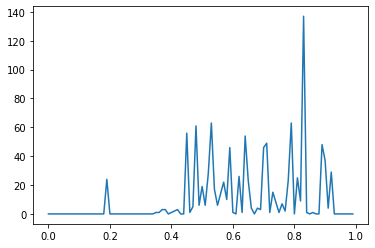

In [ ]:
plt.plot(x_axis, curve_points)
